In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from imblearn.over_sampling import SMOTE

#Loading data, getting target and features and labels, Normalizing, removing features based on feature extraction
data = pd.read_csv("creditcard.csv")
target = data['Class'].to_numpy()
target_names = np.unique(target, return_counts=False)
data = data.drop(columns =['Class'])
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data = data.drop(columns =['V2', 'V6', 'V23'])
features = data.columns.tolist()

#partitioning dataset to 75% training set and 25% test set
x_train, x_test, y_train, y_test = train_test_split(data[features], target, test_size=0.25, stratify=target, random_state=123456)

#SMOTE oversampling
os = SMOTE(random_state=0)
os_data_x,os_data_y=os.fit_sample(x_train, y_train)
x_train = pd.DataFrame(data=os_data_x,columns= data.columns)
y_train= pd.DataFrame(data=os_data_y,columns=['Class'])


In [4]:
#Building and fitting random forest classifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(x_train, y_train)

<ipython-input-4-fd0bc681dbdd>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier(oob_score=True, random_state=123456)

Mean accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.93      0.79      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



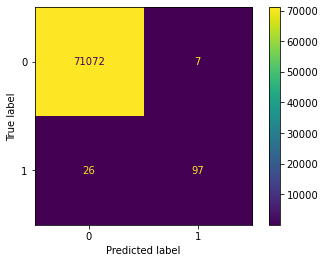

In [5]:
#Getting prediction results and accuracy for Random Forest
predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')
print(classification_report(y_test, predicted))
#Displaying results in confusion matrix of Random Forest
disp = plot_confusion_matrix(rf, x_test, y_test, display_labels=target_names)
plt.show()

In [6]:
#Building and fitting Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(x_train, y_train)

C:\Users\Brian\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

Mean accuracy score: 0.979
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.07      0.85      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.92      0.56     71202
weighted avg       1.00      0.98      0.99     71202



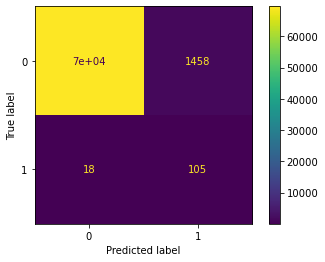

In [7]:
#Getting prediction results and accuracy for Naive Bayes
predicted = gnb.predict(x_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')
print(classification_report(y_test, predicted))
#Displaying results in confusion matrix of Naive Bayes
disp = plot_confusion_matrix(gnb, x_test, y_test, display_labels=target_names)
#plt.show()

In [36]:
#Building and fitting Logistic Regression model
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)

C:\Users\Brian\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=1000)

Mean accuracy score: 0.976
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202



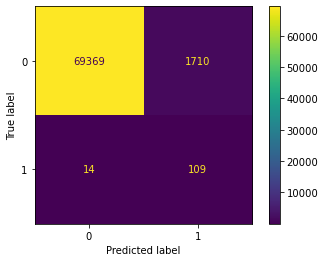

In [37]:
#Getting prediction results and accuracy for Logistic Regression
predicted = lr.predict(x_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')
print(classification_report(y_test, predicted))
#Displaying results in confusion matrix of Logistic Regression
disp = plot_confusion_matrix(lr, x_test, y_test, display_labels=target_names)
plt.show()

In [38]:
#Building and fitting Support Vector Machine
sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)

C:\Users\Brian\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

Mean accuracy score: 0.975
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.97      0.99     71202



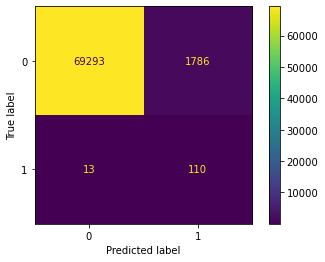

In [39]:
#Getting prediction results and accuracy for Support Vector Machine
predicted = sv.predict(x_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')
print(classification_report(y_test, predicted))
#Displaying results in confusion matrix of Support Vector Machine
disp = plot_confusion_matrix(sv, x_test, y_test, display_labels=target_names)
plt.show()